# Importing Libraries

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.model_selection import RandomizedSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from scikeras.wrappers import KerasClassifier
from keras.regularizers import l1_l2


In [218]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [219]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [220]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [221]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [222]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [224]:
#Checking duplicates
print("Duplicates in Training Data")
print((train_df.duplicated().sum()),round(train_df.duplicated().sum()/len(train_df)*100,2))
print("Duplicates in Test Data")
print((test_df.duplicated().sum()),round(test_df.duplicated().sum()/len(train_df)*100,2))

Duplicates in Training Data
0 0.0
Duplicates in Test Data
0 0.0


In [225]:
#Checking Dtypes
print("Checking Dtypes in Training Data")
print("\n")
print(train_df.dtypes)
print("\n")
print("-"*40)
print("Checking Dtypes in Test Data")
print(test_df.dtypes)

Checking Dtypes in Training Data


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


----------------------------------------
Checking Dtypes in Test Data
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [226]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [227]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


# EDA

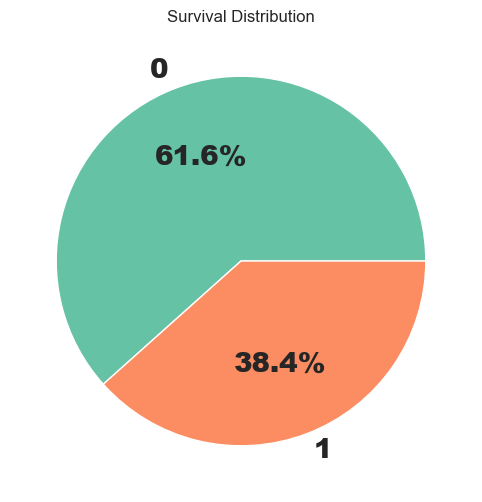

In [228]:
plt.figure(figsize = (12,6))
plt.pie(train_df["Survived"].value_counts(),labels = train_df["Survived"].value_counts().keys(),autopct="%1.1f%%",textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Survival Distribution")
plt.show()

Only 38% of people survived

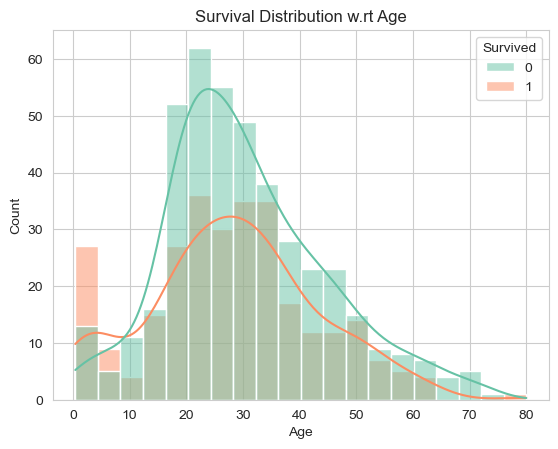

In [229]:
sns.histplot(x="Age",data=train_df,kde=True,hue="Survived",palette="Set2",bins=20)
plt.title("Survival Distribution w.rt Age")
plt.show()

* Distribution is Normal
* Most of the people survived within 10 years of age
* Minimum age is 0 amd Max age is 80


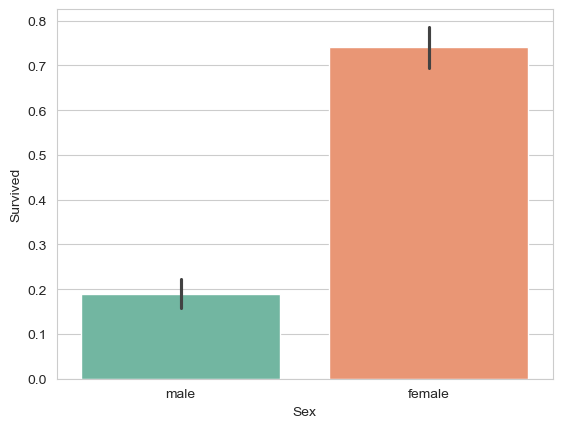

The percentage of values 
Survival Ratio of Males: 18.890814558058924
Survival Ratio of Females 74.20382165605095


In [230]:
sns.barplot(x='Sex',y='Survived',data=train_df,palette="Set2")
plt.show()
print("The percentage of values ")
print("Survival Ratio of Males:",train_df["Survived"][train_df["Sex"]=="male"].value_counts(normalize=True)[1]*100)
print("Survival Ratio of Females",train_df["Survived"][train_df["Sex"]=="female"].value_counts(normalize=True)[1]*100)

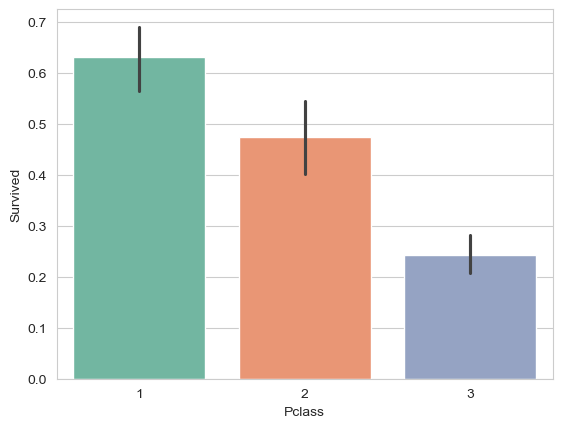

Survival Rate of Class1 62.96
Survival Rate of Class2 47.28
Survival Rate of Class3 24.24


In [231]:
sns.barplot(x='Pclass',y='Survived',data=train_df,palette="Set2")
plt.show()
print("Survival Rate of Class1",round(train_df["Survived"][train_df["Pclass"]==1].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of Class2",round(train_df["Survived"][train_df["Pclass"]==2].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of Class3",round(train_df["Survived"][train_df["Pclass"]==3].value_counts(normalize=True)[1]*100,2))

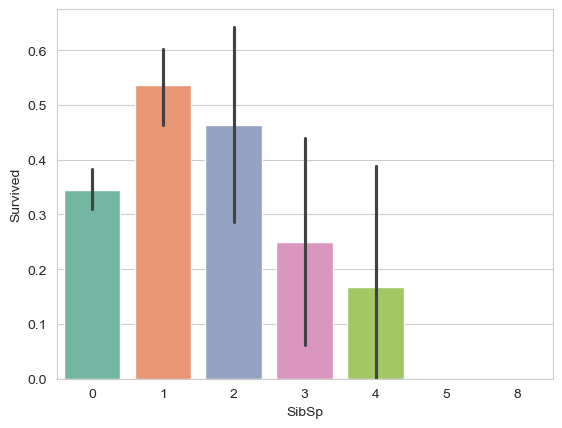

Survival Rate of 0 Siblings 34.54
Survival Rate of 1 Siblings 53.59
Survival Rate of 2 Siblings 46.43
Survival Rate of 3 Siblings 25.0
Survival Rate of 4 Siblings 16.67


In [232]:
sns.barplot(x='SibSp',y='Survived',data=train_df,palette="Set2")
plt.show()
print("Survival Rate of 0 Siblings",round(train_df["Survived"][train_df["SibSp"]==0].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 1 Siblings",round(train_df["Survived"][train_df["SibSp"]==1].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 2 Siblings",round(train_df["Survived"][train_df["SibSp"]==2].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 3 Siblings",round(train_df["Survived"][train_df["SibSp"]==3].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 4 Siblings",round(train_df["Survived"][train_df["SibSp"]==4].value_counts(normalize=True)[1]*100,2))



* The survival rate of a couple or a couple with a single parent/child has highest survival rate.
* The survival rate of a single identity comes next.
* The survival rate with more more family members is low.

In [233]:
train_df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

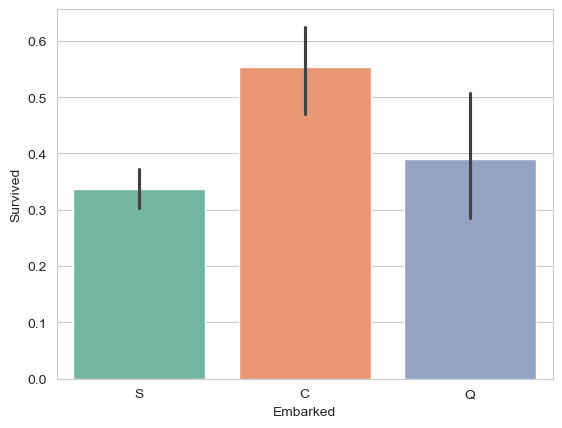

Survival Rate of passengers embarked from Cherbourg 55.36
Survival Rate of passengers embarked from Queensland 38.96
Survival Rate of passengers embarked from SouthHampton 33.7


In [234]:
sns.barplot(x="Embarked",y="Survived",data=train_df,palette="Set2")
plt.show()
print("Survival Rate of passengers embarked from Cherbourg",round(train_df["Survived"][train_df["Embarked"]=="C"].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of passengers embarked from Queensland",round(train_df["Survived"][train_df["Embarked"]=="Q"].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of passengers embarked from SouthHampton",round(train_df["Survived"][train_df["Embarked"]=="S"].value_counts(normalize=True)[1]*100,2))

Survival Rate from Cherbourg was highest while from SouthHampton was lowest

Lets plot Pclass with Passengers Embarked

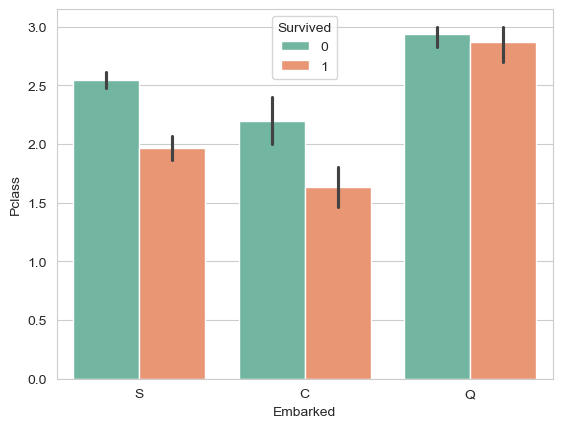

In [235]:
sns.barplot(x='Embarked',y='Pclass',hue="Survived",data=train_df,palette="Set2")
plt.show()

Plotting Age after converting into categories

In [236]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train_df.Age, bins, labels = labels)
train_df['AgeGroup'] = age_groups
test_df['AgeGroup'] = age_groups

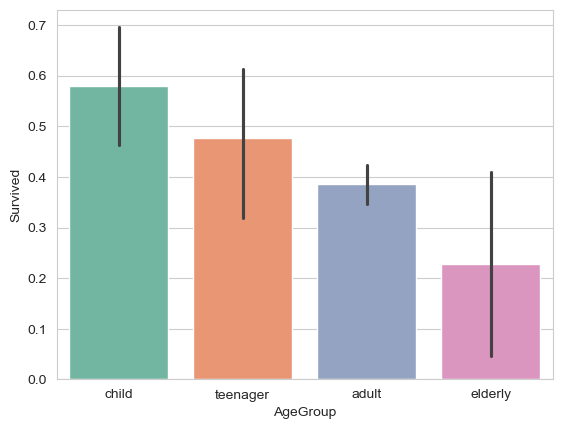

In [237]:
sns.barplot(x='AgeGroup',y='Survived',data=train_df,palette="Set2")
plt.show()

# Feature Engineering


### Extracting Titles from Names

In [238]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [239]:
def extract_title(df):
    df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    df['Title']=df['Title'].replace(['Lady','Mme','the Countess','Dona'],'Mrs')
    df['Title']=df['Title'].replace(['Col','Major','Capt'],'Military Officer')
    df['Title']=df['Title'].replace(['Mlle','Ms'],'Miss')
    df['Title']=df['Title'].replace(['Dr','Rev','Jonkheer','Sir','Don'],'Noble')





In [240]:
extract_title(train_df)
extract_title(test_df)

In [241]:
train_df['Title'].value_counts()

Title
Mr                  517
Miss                185
Mrs                 128
Master               40
Noble                16
Military Officer      5
Name: count, dtype: int64

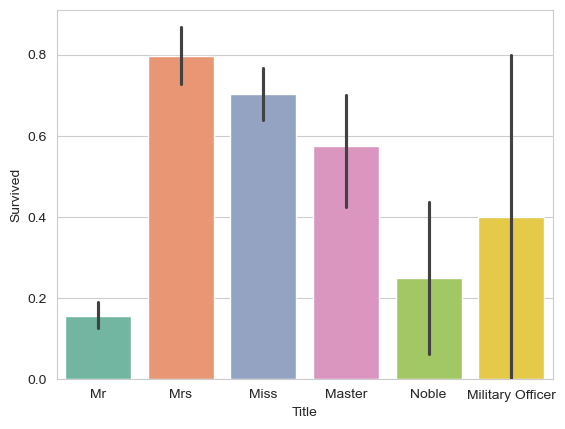

In [242]:
sns.barplot(x='Title',y='Survived',data=train_df,palette="Set2")
plt.show()

In [243]:
print("Survival Rates of Titles")
print("Mr")
print(round(train_df["Survived"][train_df["Title"]=="Mr"].value_counts(normalize=True)[1]*100,2))
print("Mrs")
print(round(train_df["Survived"][train_df["Title"]=="Mrs"].value_counts(normalize=True)[1]*100,2))
print("Miss")
print(round(train_df["Survived"][train_df["Title"]=="Miss"].value_counts(normalize=True)[1]*100,2))
print("Master")
print(round(train_df["Survived"][train_df["Title"]=="Master"].value_counts(normalize=True)[1]*100,2))
print("Noble")
print(round(train_df["Survived"][train_df["Title"]=="Noble"].value_counts(normalize=True)[1]*100,2))
print("Military Officer")
print(round(train_df["Survived"][train_df["Title"]=="Military Officer"].value_counts(normalize=True)[1]*100,2))

Survival Rates of Titles
Mr
15.67
Mrs
79.69
Miss
70.27
Master
57.5
Noble
25.0
Military Officer
40.0


In [244]:
def manipulate_family_members(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['FamilySize']>1]=0


In [245]:
manipulate_family_members(train_df)
manipulate_family_members(test_df)

In [246]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,Mr,1,1


In [247]:
def extract_deck(df):
    df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
    df['Deck']=df['Deck'].replace(['A','B','C'],'ABC')
    df['Deck']=df['Deck'].replace(['D','E'],'DE')
    df['Deck']=df['Deck'].replace(['F','G'],'FG')

In [248]:
extract_deck(train_df)
extract_deck(test_df)

In [249]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,IsAlone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,Mr,2,0,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,2,0,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,Miss,1,1,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,2,0,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,Mr,1,1,M


In [250]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,IsAlone,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,adult,Mr,1,1,M
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,adult,Mrs,2,0,M
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,adult,Mr,1,1,M
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,adult,Mr,1,1,M
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,adult,Mrs,3,0,M


In [251]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup        83
Title            0
FamilySize       0
IsAlone          0
Deck             0
dtype: int64

# Data Preprocessing

In [252]:
#Identifying Missing Values
df1=(train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={'0':'No of Missing Values'})
df1['% of Missing Values']=round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1.sort_values(by='% of Missing Values', ascending=False, inplace=True)
df1

,0,% of Missing Values
Cabin,687,77.10
AgeGroup,177,19.87
Embarked,2,0.22


In [253]:
#Copying passenger id of test csv as we need it in future
pass_df=test_df[["PassengerId"]]

In [254]:
#Dropping Unncessary cols
def drop_columns(df):
    cols_to_drop=['PassengerId','Name','Ticket','Cabin']
    for col in cols_to_drop:
        df.drop(columns=[col],inplace=True)


In [255]:
drop_columns(train_df)
drop_columns(test_df)

In [256]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title,FamilySize,IsAlone,Deck
0,0,3,male,22.0,1,0,7.2500,S,adult,Mr,2,0,M
1,1,1,female,38.0,1,0,71.2833,C,adult,Mrs,2,0,ABC
2,1,3,female,26.0,0,0,7.9250,S,adult,Miss,1,1,M
3,1,1,female,35.0,1,0,53.1000,S,adult,Mrs,2,0,ABC
4,0,3,male,35.0,0,0,8.0500,S,adult,Mr,1,1,M


In [257]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    889 non-null    object  
 8   AgeGroup    714 non-null    category
 9   Title       891 non-null    object  
 10  FamilySize  891 non-null    int64   
 11  IsAlone     891 non-null    int64   
 12  Deck        891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB


In [258]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    object  
 2   Age         418 non-null    float64 
 3   SibSp       418 non-null    int64   
 4   Parch       418 non-null    int64   
 5   Fare        417 non-null    float64 
 6   Embarked    418 non-null    object  
 7   AgeGroup    335 non-null    category
 8   Title       418 non-null    object  
 9   FamilySize  418 non-null    int64   
 10  IsAlone     418 non-null    int64   
 11  Deck        418 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 36.7+ KB


In [259]:
#Imputing Missing Values
cat_cols=train_df.select_dtypes(include=['object','category']).columns.tolist()
num_cols=train_df.select_dtypes(include=['int64','float64']).columns.tolist()

In [260]:
print(cat_cols)

['Sex', 'Embarked', 'AgeGroup', 'Title', 'Deck']


In [261]:
print(num_cols)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']


In [262]:
num_cols.remove('Survived')

### Imputing Missing Values

In [263]:
imputer1=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer(strategy='median')
def fill_missing(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])


In [264]:
fill_missing(train_df)
fill_missing(test_df)

In [265]:
train_df.isnull().sum()[train_df.isnull().sum().sum()]

0

In [266]:
test_df.isnull().sum()[test_df.isnull().sum().sum()]

0

### Checking high Cardinality Values

In [267]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
Sex         2
Embarked    3
AgeGroup    4
Title       6
Deck        5
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
Sex         2
Embarked    3
AgeGroup    4
Title       6
Deck        4
dtype: int64


In [268]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    float64
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    float64
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   AgeGroup    891 non-null    object 
 9   Title       891 non-null    object 
 10  FamilySize  891 non-null    float64
 11  IsAlone     891 non-null    float64
 12  Deck        891 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 90.6+ KB


### Encoding of variables to be used in Machine Learning Modelling

In [269]:
#Changing of Variables to correct datatype
def change_variable(df):
    df['IsAlone']=df['IsAlone'].astype('bool')
    df['FamilySize']=df['FamilySize'].astype('int')
    df['Parch']=df['Parch'].astype('int')
    df['SibSp']=df['SibSp'].astype('int')
    df['Pclass']=df['Pclass'].astype('int')


In [270]:
change_variable(train_df)
change_variable(test_df)

In [271]:
ordinal_cat_cols=['Deck']
nominal_cat_cols=['Sex','Embarked','AgeGroup','Title','IsAlone']

In [272]:
#Encoding Ordinal Columns
enc=LabelEncoder()
train_df[ordinal_cat_cols]=train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols]=test_df[ordinal_cat_cols].apply(enc.fit_transform)


In [273]:
#Encoding Nominal Cols
train_df=pd.get_dummies(train_df,columns=nominal_cat_cols,dtype=int)
test_df=pd.get_dummies(test_df,columns=nominal_cat_cols,dtype=int)

### Now our training and test datasets are fit to be modelled by our machine learning algorithms

In [274]:
#Splitting Training and Test Dataset
X=train_df.drop(columns=["Survived"],axis=1)
y=train_df["Survived"]

In [275]:
#Feature Scaling for Non Tree Algorithms
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
test_df_scaled=scaler.fit_transform(test_df)


In [276]:
print(X_scaled)

[[ 0.82737724 -0.09592825  0.43279337 ... -0.13522468  1.2316449
  -1.2316449 ]
 [-1.56610693  0.80694372  0.43279337 ... -0.13522468  1.2316449
  -1.2316449 ]
 [ 0.82737724  0.12978974 -0.4745452  ... -0.13522468 -0.81192233
   0.81192233]
 ...
 [ 0.82737724 -1.36559194  0.43279337 ... -0.13522468  1.2316449
  -1.2316449 ]
 [-1.56610693  0.12978974 -0.4745452  ... -0.13522468 -0.81192233
   0.81192233]
 [ 0.82737724  0.46836673 -0.4745452  ... -0.13522468 -0.81192233
   0.81192233]]


In [277]:
#Splitting Data for algorithms which require scaling
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [278]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 24) (179, 24) (712,) (179,)


In [279]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)

In [280]:
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(712, 24) (179, 24) (712,) (179,)


In [281]:
params = {
'batch_size':[50,100],
'epochs':[100,200]
}

In [282]:
def build_model():
    model=Sequential()
    model.add(Dense(units=64,input_dim=24,activation='relu',kernel_initializer='uniform',kernel_regularizer=l1_l2(l1=0.0001,l2=0.00001)))
    model.add(Dropout(0.2))
    model.add(Dense(units=32,activation='relu',kernel_initializer='uniform',kernel_regularizer=l1_l2(l1=0.0001,l2=0.00001)))
    model.add(Dropout(0.2))
    model.add(Dense(units=8,activation='relu',kernel_initializer='uniform',kernel_regularizer=l1_l2(l1=0.0001,l2=0.00001)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model




### Hyperparameter Tuning

In [283]:
'''
hyperparameter_model=KerasClassifier(build_fn=build_model)
cv1=RandomizedSearchCV(estimator=hyperparameter_model,param_distributions=params,cv=2,verbose=1,n_jobs=1,random_state=42,n_iter=2)
cv1.fit(x_train,y_train)
print(cv1.best_params_)
print(cv1.best_score_)
'''

'\nhyperparameter_model=KerasClassifier(build_fn=build_model)\ncv1=RandomizedSearchCV(estimator=hyperparameter_model,param_distributions=params,cv=2,verbose=1,n_jobs=1,random_state=42,n_iter=2)\ncv1.fit(x_train,y_train)\nprint(cv1.best_params_)\nprint(cv1.best_score_)\n'

In [284]:
model=build_model()
model.fit(x_train,y_train,epochs=200,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5567 - loss: 0.7015 - val_accuracy: 0.5866 - val_loss: 0.6979
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6573 - loss: 0.6951 - val_accuracy: 0.6425 - val_loss: 0.6907
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6957 - loss: 0.6862 - val_accuracy: 0.7430 - val_loss: 0.6768
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7863 - loss: 0.6682 - val_accuracy: 0.8045 - val_loss: 0.6499
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8209 - loss: 0.6365 - val_accuracy: 0.8101 - val_loss: 0.6032
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8354 - loss: 0.5785 - val_accuracy: 0.8045 - val_loss: 0.5417
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8274 - loss: 0.5165 - val_accuracy: 0.7989 - val_loss: 0.4901
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8276 - loss: 0.4999 - val_accuracy: 0.8045 - val_loss:

In [285]:
final_pred=model.predict(test_df)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [286]:
print(final_pred)

[[2.08281392e-07]
 [8.25449931e-10]
 [1.98607949e-12]
 [6.58405042e-06]
 [1.54301422e-04]
 [2.08624522e-03]
 [2.08830829e-06]
 [5.63277339e-04]
 [5.46323077e-04]
 [1.35605887e-03]
 [1.04427926e-01]
 [1.28280533e-07]
 [1.00000000e+00]
 [5.22047301e-11]
 [9.94779885e-01]
 [2.04744041e-02]
 [6.53832160e-07]
 [7.58930328e-05]
 [6.08060782e-06]
 [3.40321704e-09]
 [4.66229758e-05]
 [2.85613094e-03]
 [9.94884610e-01]
 [9.99998808e-01]
 [1.00000000e+00]
 [8.77136364e-10]
 [9.99999702e-01]
 [3.94698691e-05]
 [6.39853170e-06]
 [5.52673787e-02]
 [1.59969673e-08]
 [4.87355795e-03]
 [6.66338838e-06]
 [5.32216057e-02]
 [9.99967933e-01]
 [2.25873970e-04]
 [1.28222212e-01]
 [1.35585913e-04]
 [1.94745062e-05]
 [9.92752731e-01]
 [8.73454340e-08]
 [7.67069459e-01]
 [1.05508269e-08]
 [1.18798234e-05]
 [2.44783685e-01]
 [1.29546388e-05]
 [1.19355661e-06]
 [8.57085213e-02]
 [9.98058259e-01]
 [7.03879266e-07]
 [9.99991000e-01]
 [4.03984741e-05]
 [2.73950049e-03]
 [1.00000000e+00]
 [6.71052486e-02]
 [1.669328

In [287]:
competition_predictions=(final_pred > 0.5).astype(int)

In [288]:
pass_df['Survived']=competition_predictions

In [289]:
pass_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [290]:
pass_df.to_csv("Titanic_Predictions.csv",index=False)